<a href="https://colab.research.google.com/github/ClickerDG/datamining/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная робота 1 - Козлов В.О., КС-43

Аутентифицируем юзера

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Сеттим линку на цсв файл

In [ ]:
link = 'https://drive.google.com/file/d/1TLC2_HoNcH-d5gpqQSC_-J2s-BAztYb2/view?usp=sharing' 
linkPart, trash = link.split('/view')
trash, id = linkPart.split('/d/')
print (id)

1TLC2_HoNcH-d5gpqQSC_-J2s-BAztYb2


Качаем файлик в колаб сторэдж

In [ ]:
import pandas as pd

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sms-spam-corpus.csv')  
csvDataFrame = pd.read_csv('sms-spam-corpus.csv', encoding='latin1', )
csvDataFrame.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Чистим сообщения от спецсимволов, цифр и стопслов

In [ ]:
import re
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

stemmer = SnowballStemmer('english')

stopWords = ['', 'am', 'is', 'are', 'be', 'being', 'been', 'have', 'has', 'having', 'had', 'do', 'does', 'doing', 'did']
# csvDataFrame['v2'].map(lambda x: print(x));
csvDataFrame['v2'].replace(regex=True, inplace=True, to_replace=r'[^a-zA-Z\s]', value=r'')
csvDataFrame['v2'].replace(regex=True, inplace=True, to_replace=stopWords, value=r'')

def stemming(content):
  words = word_tokenize(content)
  stemmedWords = [stemmer.stem(word) for word in words]
  sentence = ' '.join(stemmedWords)
  return sentence


csvDataFrame['v2'] = csvDataFrame['v2'].map(lambda content: content.lower()).astype(str)
csvDataFrame['v2'] = csvDataFrame['v2'].map(lambda content: stemming(content)).astype(str)
csvDataFrame['v2'].map(lambda content: print(content));

Выходные данные были обрезаны до нескольких последних строк (5000).
wait for your call
nope i wait in sch daddi
you won cash or a prize to claim call
im tire of argu with you about th week after week do what you want and from now on ill the se
wait me in sch i finh ard
our mobil numr won to claim call us back or ring the claim hot line on
arngd marriag while u r walkin unfortunt a snake bite u bt love marriag danc in frnt of d snake p sayin bite me bite me
huh so earli then dinner outsid izzit
ok anyway no need to chang with what you said
we tri to contact you re your repli to our offer of min textand a new video phone call now or repli for free deliveri tomorrow
my exwif was not abl to kid do you want kid one day
so how scotland hope you not over show your jjc tendenc take c live the dre
tell them u a headach and just want to use hour of sick time
i dun thk ill quit yet hmmm can go jazz yogasana oso can we can go meet em after our lesson den
pete can you pleas ring meiv hard gotani cr

3. Коллектим слова в словари. Сортируем их и записываем в файл


In [25]:
import os
from collections import defaultdict

try:
  os.mkdir('output')
except:
  print('Directory output is already exists. Procceed working...')

fileSpam = open('output/spam.txt', 'w')
isSpam = csvDataFrame['v1'] == 'spam'
spam = csvDataFrame[isSpam]['v2']
spamDictionary = defaultdict(int)

for message in spam:
  words = word_tokenize(message)
  for word in words:
    spamDictionary[word] += 1

for key, value in sorted(spamDictionary.items(), key=lambda value: value[1], reverse=True):
  fileSpam.write('{} - {}\n'.format(key, value))

fileHam = open('output/ham.txt', 'w')
isHam = csvDataFrame['v1'] == 'ham'
ham = csvDataFrame[isHam]['v2']
hamDictionary = defaultdict(int)
for message in ham:
  words = word_tokenize(message)
  for word in words:
    hamDictionary[word] += 1

for key, value in sorted(hamDictionary.items(), key=lambda value: value[1], reverse=True):
  fileHam.write('{} - {}\n'.format(key, value))

SyntaxError: ignored

4. Считаем значения для графиков

> С распределением кол-в слов и их длинн



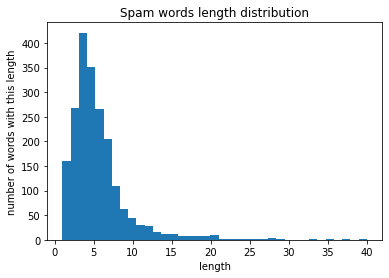

Spam mean - 5.832925036746693


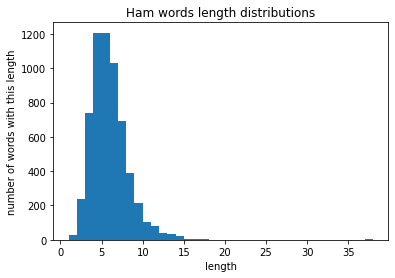

Ham mean - 5.513983120966407


In [64]:
spamLengthes = [len(word) for word in spamDictionary.keys()]
hamLengthes = [len(word) for word in hamDictionary.keys()]

spamDF = pd.DataFrame({'spamLengthes' : spamLengthes})
hamDF = pd.DataFrame({'hamLengthes' : hamLengthes})

import matplotlib.pyplot as plt
from statistics import mean

plt.hist(spamDF['spamLengthes'], bins=int(185/5))
plt.title('Spam words length distribution')
plt.xlabel('length')
plt.ylabel('number of words with this length')
plt.savefig('output/spamWordsLengthDistribution.png')
plt.show()

print('Spam words mean - {}'.format(mean(spamLengthes)))

plt.hist(hamDF['hamLengthes'], bins=int(185/5))
plt.title('Ham words length distributions')
plt.xlabel('length')
plt.ylabel('number of words with this length')
plt.savefig('output/hamWordsLengthDistribution.png')
plt.show()

print('Ham words mean - {}'.format(mean(hamLengthes)))

> С распределением длинн сообщений и их кол-в 

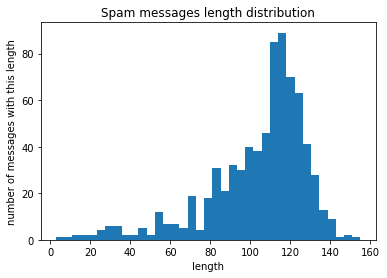

Spam messages mean - 104.01874163319947


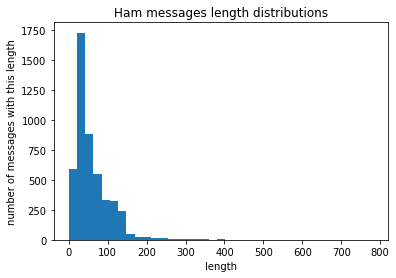

Ham messages mean - 59.769326424870464


In [65]:
spamMessagesLengthes = [len(message) for message in csvDataFrame[isSpam]['v2']]
hamMessagesLengthes = [len(message) for message in csvDataFrame[isHam]['v2']]

spamDF = pd.DataFrame({'spamMessagesLengthes' : spamMessagesLengthes})
hamDF = pd.DataFrame({'hamMessagesLengthes' : hamMessagesLengthes})

plt.hist(spamDF['spamMessagesLengthes'], bins=int(185/5))
plt.title('Spam messages length distribution')
plt.xlabel('length')
plt.ylabel('number of messages with this length')
plt.savefig('output/spamMessagesLengthDistribution.png')
plt.show()

print('Spam messages mean - {}'.format(mean(spamMessagesLengthes)))

plt.hist(hamDF['hamMessagesLengthes'], bins=int(185/5))
plt.title('Ham messages length distributions')
plt.xlabel('length')
plt.ylabel('number of messages with this length')
plt.savefig('output/hamMessagesLengthDistribution.png')
plt.show()

print('Ham messages mean - {}'.format(mean(hamMessagesLengthes)))



> Проводим частотный анализ слов

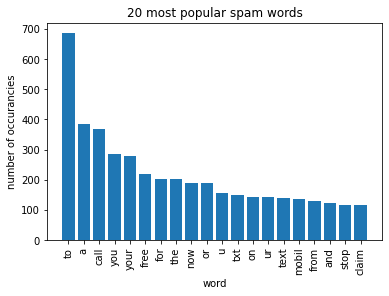

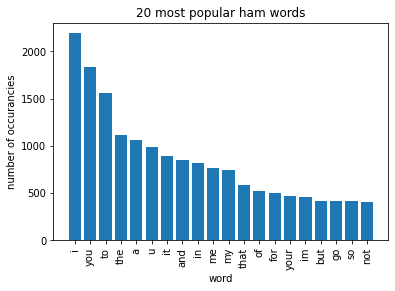

In [85]:
listOf20MostPopularSpamWords = sorted(spamDictionary.items(), key=lambda value: value[1], reverse=True)[:20]
listOf20MostPopularHamWords = sorted(hamDictionary.items(), key=lambda value: value[1], reverse=True)[:20]

mostPopularSpamWords = dict(listOf20MostPopularSpamWords)
mostPopularHamWords = dict(listOf20MostPopularHamWords)

plt.bar(mostPopularSpamWords.keys(), mostPopularSpamWords.values())
plt.title('20 most popular spam words')
plt.xlabel('word')
plt.ylabel('number of occurancies')
plt.xticks(rotation = 90)
plt.savefig('output/spamWords20Bar.png')
plt.show()

plt.bar(mostPopularHamWords.keys(), mostPopularHamWords.values())
plt.title('20 most popular ham words')
plt.xlabel('word')
plt.ylabel('number of occurancies')
plt.xticks(rotation = 90)
plt.savefig('output/hamWords20Bar.png')
plt.show()